<a href="https://colab.research.google.com/github/nvisagan/Project1/blob/master/Contraceptive_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delivarables
1. Blog post
Required

Choose your own topic and data.
Write a blog post with at least two data visualizations, to communicate insights on your topic.
Publish your post on Medium or your portfolio site.
Don’t use data from Kaggle competitions or popular “toy” datasets.

2. Code
Required

Create Python notebook(s) to wrangle, analyze, and visualize your data.
Push your notebook(s) to your GitHub.
Recommended

Keep it simple. Don’t use machine learning. (You’ll do this in future projects!)

3. Short summary
Required

Describe your project in 280 characters or less.
Choose one data visualization (static image or animated gif) from your blog post.
Annotate your visualization so it’s understandable on its own, without reading your blog post.
Recommended

Share your short project summary on Twitter or LinkedIn, and link to your blog post.

4. Portfolio
Required

Add your short summary to your portfolio site.
Link from your portfolio site to your blog post and code.
Recommended

Host your site with GitHub Pages.
Include your name, bio, and contact info on your site.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.style as style

In [0]:
# Load Data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"

#Header need to be fixed 
column_headers = ["Wife's_age", "Wife's_education",
                  "Husband's_education", "Number_of_children_ever_born",
                  "Wife's_religion", "Wife's_now_working?",
                  "Husband's_occupation","Standard_of_living index", 
                  "Media_exposure","Contraceptive_method_used",
                  "Missing_Attribute_Values"                 
]

contradf = pd.read_csv(url, names=column_headers)
contradf.head()

,Wife's_age,Wife's_education,Husband's_education,Number_of_children_ever_born,Wife's_religion,Wife's_now_working?,Husband's_occupation,Standard_of_living index,Media_exposure,Contraceptive_method_used,Missing_Attribute_Values
0,24,2,3,3,1,1,2,3,0,1,NaN
1,45,1,3,10,1,1,3,4,0,1,NaN
2,43,2,3,7,1,1,3,4,0,1,NaN
3,42,3,2,9,1,1,3,3,0,1,NaN
4,36,3,3,8,1,1,3,2,0,1,NaN


In [0]:
contradf.describe()

,Wife's_age,Wife's_education,Husband's_education,Number_of_children_ever_born,Wife's_religion,Wife's_now_working?,Husband's_occupation,Standard_of_living index,Media_exposure,Contraceptive_method_used,Missing_Attribute_Values
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,0.0
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891,NaN
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376,NaN
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000,NaN
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,NaN
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000,NaN
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000,NaN


In [0]:
cleaned = contradf.drop(["Wife's_age", "Wife's_education",
                  "Husband's_education","Wife's_religion", 
                  "Husband's_occupation","Standard_of_living index", 
                  "Media_exposure", "Missing_Attribute_Values"], axis=1)

cleaned.tail()

,Number_of_children_ever_born,Wife's_now_working?,Contraceptive_method_used
1468,2,0,3
1469,3,1,3
1470,8,0,3
1471,4,0,3
1472,1,1,3


In [0]:
# Working with Contraceptive One use 

wcOne = contradf[(contradf["Contraceptive_method_used"] == 1)]


#Drop the other except the work and # of children
wcOne = wcOne.drop(["Wife's_education",
                  "Husband's_education", "Wife's_religion", "Wife's_now_working?",
                  "Husband's_occupation","Standard_of_living index", 
                  "Media_exposure","Missing_Attribute_Values"], axis=1)
wcOne.describe()

,Wife's_age,Number_of_children_ever_born,Contraceptive_method_used
count,629.000000,629.000000,629.0
mean,33.424483,2.934817,1.0
std,9.123853,2.655462,0.0
min,16.000000,0.000000,1.0
25%,25.000000,1.000000,1.0
50%,32.000000,2.000000,1.0
75%,42.000000,4.000000,1.0
max,49.000000,12.000000,1.0


In [0]:
# Contraceptive 2 
wcTwo = contradf[(contradf["Contraceptive_method_used"] == 2)]

# Drop unwanted columns

wcTwo = wcTwo.drop(["Wife's_education",
                  "Husband's_education", "Wife's_religion", "Wife's_now_working?",
                  "Husband's_occupation","Standard_of_living index", 
                  "Media_exposure","Missing_Attribute_Values"], axis=1)

wcTwo.describe()

,Wife's_age,Number_of_children_ever_born,Contraceptive_method_used
count,333.000000,333.000000,333.0
mean,34.384384,3.738739,2.0
std,7.454844,2.104406,0.0
min,17.000000,1.000000,2.0
25%,28.000000,2.000000,2.0
50%,35.000000,3.000000,2.0
75%,41.000000,5.000000,2.0
max,49.000000,13.000000,2.0


In [0]:
#Contra three 
wcThree = contradf[(contradf["Contraceptive_method_used"] == 3)]

#Same Drop
wcThree = wcThree.drop(["Wife's_education",
                  "Husband's_education", "Wife's_religion", "Wife's_now_working?",
                  "Husband's_occupation","Standard_of_living index", 
                  "Media_exposure","Missing_Attribute_Values"], axis=1)

wcThree.describe()

,Wife's_age,Number_of_children_ever_born,Contraceptive_method_used
count,511.000000,511.000000,511.0
mean,30.244618,3.352250,3.0
std,6.943811,2.049675,0.0
min,16.000000,0.000000,3.0
25%,25.000000,2.000000,3.0
50%,29.000000,3.000000,3.0
75%,35.000000,4.000000,3.0
max,49.000000,16.000000,3.0


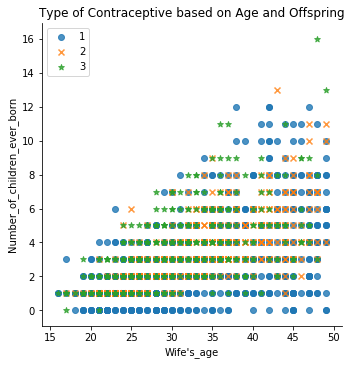

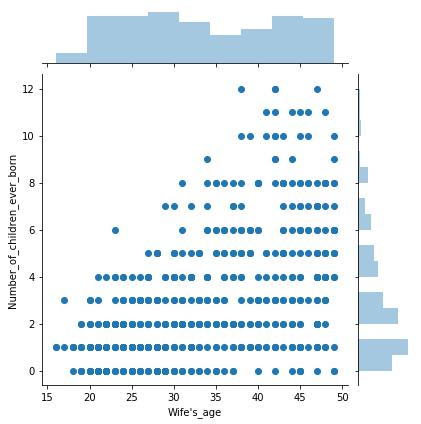

In [0]:
#Look at graph where does the wife's age affect the type of contraceptive 

sns.lmplot(x= "Wife's_age", y="Number_of_children_ever_born", data=contradf, fit_reg=False, hue="Contraceptive_method_used",
           legend=False,markers=["o", "x", "*",] )
plt.legend(loc="best")
plt.title("Type of Contraceptive based on Age and Offspring");
sns.jointplot(x="Wife's_age", y="Number_of_children_ever_born", data=wcOne);

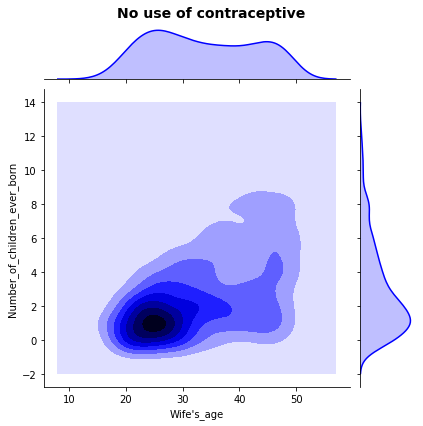

In [0]:
#KDE for ContraOne  


grid = sns.jointplot(x="Wife's_age", y="Number_of_children_ever_born", data=wcOne, kind="kde",color="blue", )

grid.fig.subplots_adjust(top=0.93)
grid.fig.suptitle('No use of contraceptive', 
              fontsize=14, 
              fontweight='bold');
grid.savefig("No Use of Contraceptive")

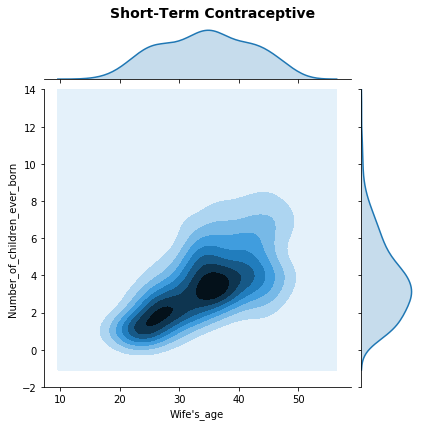

In [0]:
grid = sns.jointplot(x="Wife's_age", y="Number_of_children_ever_born", data=wcTwo, kind="kde", ylim=(-2,14))

grid.fig.subplots_adjust(top=0.93)
grid.fig.suptitle('Short-Term Contraceptive', 
              fontsize=14, 
              fontweight='bold');
grid.savefig("Short-Term Contraceptive")

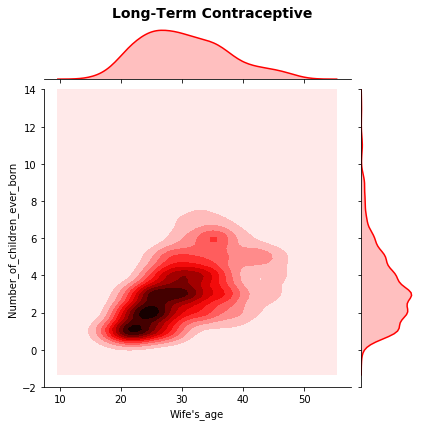

In [0]:
grid = sns.jointplot(x="Wife's_age", y="Number_of_children_ever_born", data=wcThree, kind="kde", color="red", ylim=(-2,14))

grid.fig.subplots_adjust(top=0.93)
grid.fig.suptitle('Long-Term Contraceptive', 
              fontsize=14, 
              fontweight='bold');
grid.savefig("Long-Term Contraceptive")

In [0]:
# Finish Medium Post
# Write Short summary
# Upload to github and git hub pages



Can the age of a wife and the number children she has given birth to affect the type of contraceptive she would like use? Well ,using the data from UC irvine's database, I looked at 1500 data values from wives' that chose to either not use a contraceptive, use a short-term contraceptive, or use a long term contraceptive. Creating density plots for each choice I came to a conclusion that when looking at just the age and children, younger wives move toward a long term contraceptive over the other two choices.   